In [1]:
import numpy as np
import pandas as pd

In [2]:
y_train_all = pd.read_pickle('response_doc2vec_train.pkl')
y_test_all = pd.read_pickle('response_doc2vec_test.pkl')

In [3]:
df = y_train_all.append(pd.DataFrame(data = y_test_all))

In [4]:
df

,artist,song,genres,rock,singer-songwriter,pop,metal,folk,country,hip hop / rap,tokenstring
2568,Avril Lavigne,Won't Let You Go,"[canadian pop, candy pop, dance pop, pop, post...",0,0,1,0,0,0,0,"'fall', 'crush', 'fire', 'turn', 'ash', 'screa..."
55265,Willie Nelson,Have I Stayed Away Too Long,"[classic country pop, country, country rock, n...",1,1,1,0,0,1,0,"'stay', 'away', 'long', 'stay', 'away', 'long'..."
42199,Point Of Grace,One More Broken Heart,"[ccm, christian alternative rock, christian mu...",1,0,0,0,0,0,0,"'see', 'peopl', 'mere', 'exist', 'see', 'vacan..."
7173,Chicago,I Move On,"[adult standards, album rock, classic rock, fo...",1,1,0,0,1,0,0,"'catherin', 'zeta', 'jone', 'truckin', 'road',..."
1018,Alice Cooper,He's Back,"[album rock, blues rock, classic rock, glam me...",1,0,0,1,0,0,0,"'babi', 'park', 'alon', 'summer', 'night', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...
50723,Tragically Hip,Born In The Water,"[canadian indie, canadian rock, kingston on in...",1,0,0,0,0,0,0,"'roll', 'hill', 'cover', 'sued', 'heat', 'nerv..."
27885,The Killers,Mr Bright Side (Zane Lowe Session),"[modern rock, permanent wave, rock]",1,0,0,0,0,0,0,"'come', 'cage', 'doin', 'fine', 'gotta', 'gott..."
13414,Elvis Costello,Clubland,"[art rock, dance rock, folk, folk rock, mellow...",1,1,1,0,1,0,0,"'hand', 'backhand', 'bevi', 'beauti', 'go', 'l..."
18706,Grand Funk Railroad,Are You Ready,"[album rock, art rock, blues rock, classic roc...",1,0,0,0,1,1,0,"'readi', 'readi', 'trust', 'way', 'readi', 'we..."


## General Exploration

In [5]:
#here we can see that approximately 75.2% of songs in our dataset are labeled as rock, 17.8% singer-songwriter, etc.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rock,51130.0,0.752513,0.431556,0.0,1.0,1.0,1.0,1.0
singer-songwriter,51130.0,0.178036,0.382547,0.0,0.0,0.0,0.0,1.0
pop,51130.0,0.448660,0.497362,0.0,0.0,0.0,1.0,1.0
metal,51130.0,0.151594,0.358630,0.0,0.0,0.0,0.0,1.0
folk,51130.0,0.206298,0.404651,0.0,0.0,0.0,0.0,1.0
country,51130.0,0.183650,0.387202,0.0,0.0,0.0,0.0,1.0
hip hop / rap,51130.0,0.077469,0.267337,0.0,0.0,0.0,0.0,1.0


## Songs per Genre

In [74]:
#LOOK AT THIS LATER

#finding the total for each genre
total_rock = df.rock.sum()
total_sing = df["singer-songwriter"].sum()
total_pop = df["pop"].sum()
total_metal = df.metal.sum()
total_folk = df.folk.sum()
total_country = df.country.sum()
total_hip_rap = df["hip hop / rap"].sum()
counts = {"genre": ["rock", "singer-songwriter", "pop", "metal", "folk", "country", "hip hop / rap"], "number of songs": [total_rock, total_sing, total_pop, total_metal, total_folk, total_country, total_hip_rap]}
total_df = pd.DataFrame(counts)
total_df

,genre,number of songs
0,rock,38476
1,singer-songwriter,9103
2,pop,22940
3,metal,7751
4,folk,10548
5,country,9390
6,hip hop / rap,3961


Text(0.5, 0, 'number of songs')

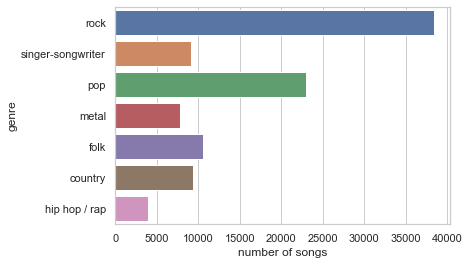

In [75]:
#plotting the total number of songs in each genre
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="number of songs", y="genre", data=total_df)
ax.set_xlabel('number of songs')

## Top Artists in Each Genre

In [76]:
#making a subset dataframe for each genre of music
df_rock = df[df["rock"] == 1]
df_sing = df[df["singer-songwriter"] == 1]
df_pop = df[df["pop"] == 1]
df_metal = df[df["metal"] == 1]
df_folk = df[df["folk"] == 1]
df_country = df[df["country"] == 1]
df_hip_hop_rap = df[df["hip hop / rap"] == 1]

#### Rock

In [78]:
#Most frequent Rock Artist
df_rock.artist.value_counts().head(20)
#Least frequent Rock Artist
#df_rock.artist.value_counts().tail(5)

Gordon Lightfoot     189
Bob Dylan            188
Loretta Lynn         187
Alabama              187
Hank Williams Jr.    185
Indigo Girls         184
Nazareth             184
Neil Young           184
America              183
Kiss                 183
Chris Rea            182
Cliff Richard        182
Bon Jovi             181
Fleetwood Mac        179
Rod Stewart          178
Deep Purple          178
Rolling Stones       178
Randy Travis         177
Iggy Pop             177
James Taylor         177
Name: artist, dtype: int64

#### Pop

In [79]:
#Most frequent Pop Artist
df_pop.artist.value_counts().head(5)
#Least frequent Pop Artist
#df_pop.artist.value_counts().tail(5)

Donna Summer     191
Cher             187
Chaka Khan       186
Indigo Girls     184
Cliff Richard    182
Name: artist, dtype: int64

#### Singer-Songwriter

In [80]:
#Most frequent Singer-Songwriter Artist
df_sing.artist.value_counts().head(5)
#Least frequent Singer-Songwriter Artist
#df_sing.artist.value_counts().tail(5)

Gordon Lightfoot    189
Bob Dylan           188
Indigo Girls        184
Neil Young          184
America             183
Name: artist, dtype: int64

#### Metal

In [81]:
#Most frequent Metal Artist
df_metal.artist.value_counts().head(5)
#Least frequent Metal Artist
#df_metal.artist.value_counts().tail(5)

Nazareth       184
Kiss           183
Bon Jovi       181
Deep Purple    178
Rush           175
Name: artist, dtype: int64

#### Folk

In [82]:
#Most frequent Folk Artist
df_folk.artist.value_counts().head(5)
#Least frequent Folk Artist
#df_folk.artist.value_counts().tail(5)

Gordon Lightfoot    189
Bob Dylan           188
Loretta Lynn        187
Indigo Girls        184
America             183
Name: artist, dtype: int64

#### Country

In [14]:
#Most frequent Country Artist
df_country.artist.value_counts().head(5)
#Least frequent Country Artist
#df_country.artist.value_counts().tail(5)

Gordon Lightfoot    189
George Strait       188
Bob Dylan           188
Alabama             187
Reba Mcentire       187
Name: artist, dtype: int64

#### Hip-Hop/Rap

In [15]:
#Most frequent Hip-Hop/Rap Artist
df_hip_hop_rap.artist.value_counts().head(20)
#Least frequent Hip-Hop/Rap Artist
#df_hip_hop_rap.artist.value_counts().tail(5)

Korn                  165
Britney Spears        158
Chris Brown           145
Ne-Yo                 145
Insane Clown Posse    136
Lil Wayne             125
Linkin Park           125
Usher                 117
Drake                 117
Fabolous              115
LL Cool J             113
Jennifer Lopez        110
Kanye West            106
Travis                 88
Nicki Minaj            88
Gucci Mane             84
Outkast                84
Ice Cube               80
Everlast               78
Zebrahead              76
Name: artist, dtype: int64

## Most Common Words

In [16]:
#reformatting the tokenstring so that it can be combined and re-tokenized
df.tokenstring = df.tokenstring.str.replace(',', '')
df.tokenstring = df.tokenstring.str.replace("'", '')
#replacing any place with two spaces with one
df.tokenstring = df.tokenstring.str.replace("  ", ' ')

In [17]:
df.tokenstring

2568     fall crush fire turn ash scream heart bleed fe...
55265    stay away long stay away long come home tonigh...
42199    see peopl mere exist see vacant eye full pain ...
7173     catherin zeta jone truckin road life although ...
1018     babi park alon summer night deep love deeper w...
                               ...                        
50723    roll hill cover sued heat nervou road downtown...
27885    come cage doin fine gotta gotta becaus want st...
13414    hand backhand bevi beauti go limit go duti go ...
18706    readi readi trust way readi well let hear say ...
38590    get wife women whiskey kill first two make see...
Name: tokenstring, Length: 51130, dtype: object

In [18]:
#combining all of the text into one object for examination
total_text = " ".join(lyric for lyric in df.tokenstring)

In [19]:
#total_text

In [20]:
#LOOKING AT THE 10 MOST COMMON WORDS
from collections import Counter
from nltk.tokenize import word_tokenize

#Tokenizing
tok = word_tokenize(total_text)

#Couting words
cnt = Counter(tok)
cnt.most_common(25)

[('get', 93246),
 ('love', 91261),
 ('know', 79181),
 ('go', 69013),
 ('like', 59628),
 ('oh', 56000),
 ('thi', 52592),
 ('say', 51832),
 ('come', 50362),
 ('time', 45524),
 ('see', 43987),
 ('na', 43197),
 ('make', 43143),
 ('one', 42765),
 ('want', 42560),
 ('take', 39050),
 ('babi', 37731),
 ('let', 36329),
 ('never', 35922),
 ('feel', 34136),
 ('way', 31992),
 ('yeah', 31261),
 ('day', 28397),
 ('heart', 27524),
 ('tell', 27522)]

### WordCloud with all Genres

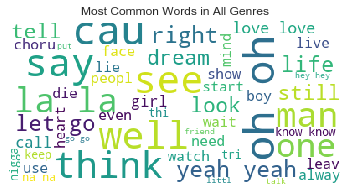

In [21]:
#pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.axis("off")
plt.title("Most Common Words in All Genres")
plt.show()

### WordCloud with Rock

In [22]:
#reassigning df_rock now that the text has been cleaned a little bit
df_rock = df[df["rock"] == 1]
#combining all of the text into one object for examination
total_text_rock = " ".join(lyric for lyric in df_rock.tokenstring)

In [23]:
#total_text_rock

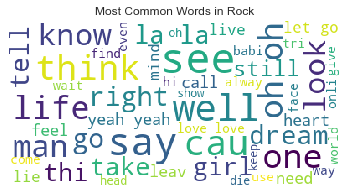

In [24]:
#pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text_rock)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.title("Most Common Words in Rock")
plt.axis("off")
plt.show()
#this is very similar to the overall wordcloud because such a large percentage of the songs are labeled as rock

### WordCloud with Pop

In [25]:
#reassigning df_pop now that the text has been cleaned a little bit
df_pop = df[df["pop"] == 1]
#combining all of the text into one object for examination
total_text_pop = " ".join(lyric for lyric in df_pop.tokenstring)

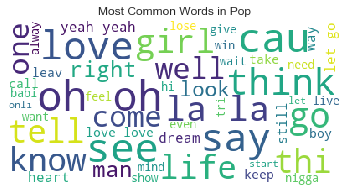

In [26]:
#pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text_pop)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.title("Most Common Words in Pop")
plt.axis("off")
plt.show()

### WordCloud in Singer-Songwriter

In [27]:
#reassigning df_sing now that the text has been cleaned a little bit
df_sing = df[df["singer-songwriter"] == 1]
#combining all of the text into one object for examination
total_text_sing = " ".join(lyric for lyric in df_sing.tokenstring)

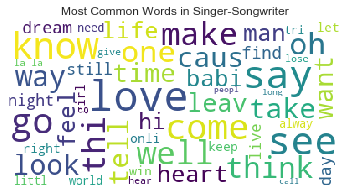

In [28]:
#pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text_sing)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.title("Most Common Words in Singer-Songwriter")
plt.axis("off")
plt.show()

### WordCloud in Metal

In [29]:
#reassigning df_metal now that the text has been cleaned a little bit
df_metal = df[df["metal"] == 1]
#combining all of the text into one object for examination
total_text_metal = " ".join(lyric for lyric in df_metal.tokenstring)

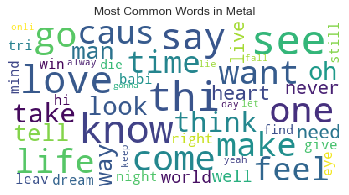

In [30]:
#pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text_metal)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.title("Most Common Words in Metal")
plt.axis("off")
plt.show()

### WordCloud in Folk

In [31]:
#reassigning df_metal now that the text has been cleaned a little bit
df_folk = df[df["folk"] == 1]
#combining all of the text into one object for examination
total_text_folk = " ".join(lyric for lyric in df_folk.tokenstring)

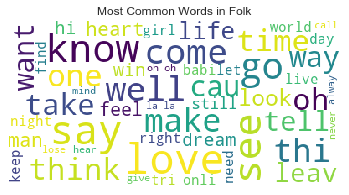

In [32]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text_folk)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.title("Most Common Words in Folk")
plt.axis("off")
plt.show()

### WordCloud in Country

In [33]:
#reassigning df_country now that the text has been cleaned a little bit
df_country = df[df["country"] == 1]
#combining all of the text into one object for examination
total_text_country = " ".join(lyric for lyric in df_country.tokenstring)

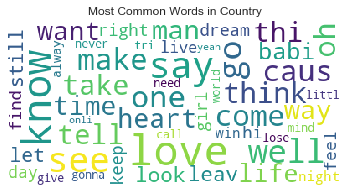

In [34]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text_country)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.title("Most Common Words in Country")
plt.axis("off")
plt.show()

### WordCloud in Hip-Hop/Rap

In [35]:
#reassigning df_hip_hop_rap now that the text has been cleaned a little bit
df_hip_hop_rap = df[df["hip hop / rap"] == 1]
#combining all of the text into one object for examination
total_text_hip_hop_rap = " ".join(lyric for lyric in df_hip_hop_rap.tokenstring)

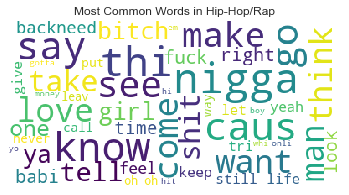

In [36]:
#pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
#Basic wordcloud generation test
wc = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(total_text_hip_hop_rap)
fig = plt.figure(figsize = (6,4))
plt.imshow(wc)
plt.title("Most Common Words in Hip-Hop/Rap")
plt.axis("off")
plt.show()

### Profanity Check

In [37]:
#pip install profanity-check

In [38]:
from profanity_check import predict, predict_prob
df_rock["has_swearing"] = df['tokenstring'].apply(lambda x: 1 if predict([x]) == 1 else 0)
df_pop["has_swearing"] = df['tokenstring'].apply(lambda x: 1 if predict([x]) == 1 else 0)
df_folk["has_swearing"] = df['tokenstring'].apply(lambda x: 1 if predict([x]) == 1 else 0)
df_country["has_swearing"] = df['tokenstring'].apply(lambda x: 1 if predict([x]) == 1 else 0)
df_sing["has_swearing"] = df['tokenstring'].apply(lambda x: 1 if predict([x]) == 1 else 0)
df_hip_hop_rap["has_swearing"] = df['tokenstring'].apply(lambda x: 1 if predict([x]) == 1 else 0)
df_metal["has_swearing"] = df['tokenstring'].apply(lambda x: 1 if predict([x]) == 1 else 0)

/Users/breabeals/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/breabeals/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/breabeals/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.

In [39]:
#percentage of rock songs with profanity
p_rock = df_rock.has_swearing.sum()/df_rock.rock.sum()
p_sing = df_sing.has_swearing.sum()/df_sing["singer-songwriter"].sum()
p_pop = df_pop.has_swearing.sum()/df_pop["pop"].sum()
p_metal = df_metal.has_swearing.sum()/df_metal.metal.sum()
p_folk = df_folk.has_swearing.sum()/df_folk.folk.sum()
p_country = df_country.has_swearing.sum()/df_country.country.sum()
p_hip = df_hip_hop_rap.has_swearing.sum()/df_hip_hop_rap["hip hop / rap"].sum()

In [40]:
prof_percen = {"genre": ["rock", "singer-songwriter", "pop", "metal", "folk", "country", "hip hop / rap"], "percentage of songs with profanity": [p_rock, p_sing, p_pop, p_metal, p_folk, p_country, p_hip]}
profanity_df = pd.DataFrame(prof_percen)
profanity_df

,genre,percentage of songs with profanity
0,rock,0.313910
1,singer-songwriter,0.251126
2,pop,0.332432
3,metal,0.466391
4,folk,0.250664
5,country,0.232907
6,hip hop / rap,0.706892


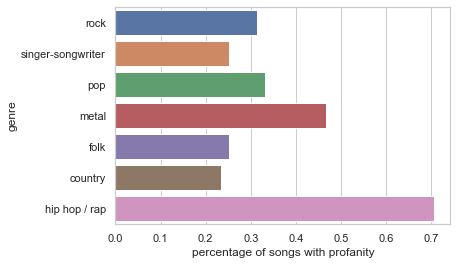

In [41]:
#plotting the total number of songs in each genre
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="percentage of songs with profanity", y="genre", data=profanity_df)

### Multi-Label Exploration

In [62]:
label1 = df[df.sum(axis=1) == 1]
print("There are {} songs with one genre label".format(len(label1)))
label2 = df[df.sum(axis=1) == 2]
print("There are {} songs with two genre label".format(len(label2)))
label3 = df[df.sum(axis=1) == 3]
print("There are {} songs with three genre label".format(len(label3)))
label4 = df[df.sum(axis=1) == 4]
print("There are {} songs with four genre label".format(len(label4)))
label5 = df[df.sum(axis=1) == 5]
print("There are {} songs with five genre label".format(len(label5)))
label6 = df[df.sum(axis=1) == 6]
print("There are {} songs with six genre label".format(len(label6)))
label7 = df[df.sum(axis=1) == 7]
print("There are {} songs with seven genre label".format(len(label7)))

There are 18983 songs with one genre label
There are 20339 songs with two genre label
There are 5761 songs with three genre label
There are 5010 songs with four genre label
There are 1037 songs with five genre label
There are 0 songs with six genre label
There are 0 songs with seven genre label


In [63]:
#pip install squarify #(algorithm for treemap)

Note: you may need to restart the kernel to use updated packages.


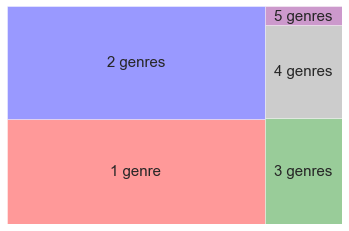

In [88]:
# libraries
import matplotlib.pyplot as plt
import squarify    

squarify.plot(sizes=[len(label1),len(label2),len(label3),len(label4), len(label5)], label=["1 genre", "2 genres", "3 genres", "4 genres", "5 genres"], 
              alpha=.4, text_kwargs={'fontsize':15},
              color=["red","blue","green", "grey", "purple"])
plt.axis('off')
plt.show()
 

### How are the Genres related to eachother?

In [155]:
df_genres = df[["rock", "singer-songwriter", "pop", "metal", "folk", "country", "hip hop / rap"]]

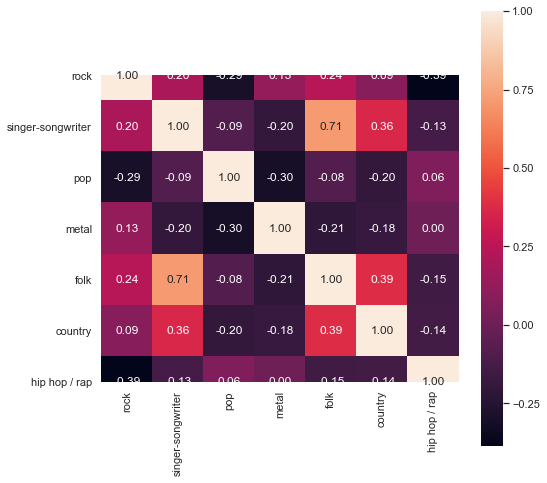

In [156]:
#correlation between all of the columns
corr = df_genres.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', square=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#singer-songwriter and folk are highly correlated

### Songs Per Artist

Total number of songs:  51130
Total number of artists:  541


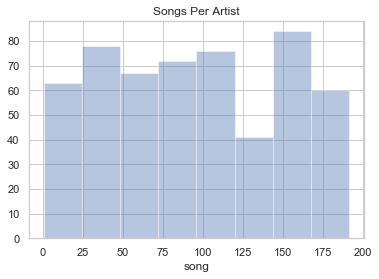

In [125]:
# number of songs
print('Total number of songs: ', str(len(df)))

# number of artist
print('Total number of artists: ', str(len(df['artist'].unique())))

# distribution songs per artist
song_count_df = df.groupby('artist')[['song']].count()
fig = sns.distplot(song_count_df.song, kde=False).set_title("Songs Per Artist")
#fig.show()

In [113]:
#Artists with most songs
song_count_df.song.sort_values(axis = 0, ascending = False)

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
                   ... 
Zazie                 2
Exo                   1
Zed                   1
Exo-K                 1
Zoe                   1
Name: song, Length: 541, dtype: int64

### Analyzing words in songs

In [121]:
# words per song
df['num_words'] = df['tokenstring'].map(len)
df["num_words"]

2568     594
55265    406
42199    711
7173     424
1018     696
        ... 
50723    590
27885    654
13414    710
18706    167
38590    523
Name: num_words, Length: 51130, dtype: int64

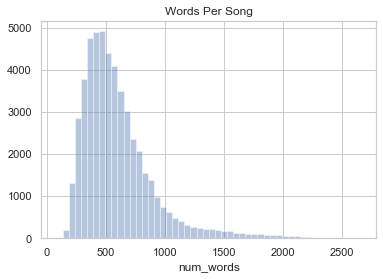

In [126]:
# distribution songs per artist
fig = sns.distplot(df.num_words, kde=False).set_title("Words Per Song")
#fig.show()

In [129]:
# number of unique words per song
df['num_unique_words'] = df['tokenstring'].map(lambda lst: len(set(lst)))
# ratio of unique words
df['unique_word_ratio'] = df['num_unique_words'] / len(df['tokenstring'])


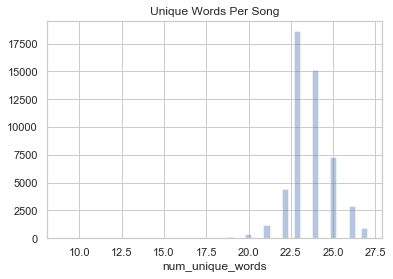

In [127]:
# distribution songs per artist
fig = sns.distplot(df.num_unique_words, kde=False).set_title("Unique Words Per Song")
#fig.show()

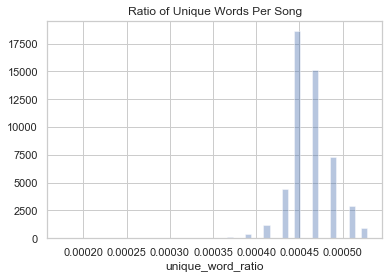

In [130]:
# distribution songs per artist
fig = sns.distplot(df.unique_word_ratio, kde=False).set_title("Ratio of Unique Words Per Song")
#fig.show()

### Sentiment Analysis

In [133]:
# sentiment scoring for each song
import nltk
from nltk import sentiment
nltk.download('vader_lexicon')
senti_analyze = sentiment.vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/breabeals/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [134]:
#trying sentiment analysis out on the first row of lyrics
senti_analyze.polarity_scores(df.tokenstring[0])

{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.9738}

In [135]:
#analyzing all lyrics with sentiment data and adding back onto the original df
df['sentiment_score'] = pd.DataFrame(df.tokenstring.apply(senti_analyze.polarity_scores).tolist())['compound']
df['sentiment'] = pd.cut(df['sentiment_score'], [-np.inf, -0.35, 0.35, np.inf], labels=['negative', 'neutral', 'positive'])

In [138]:
#viewing all of our new attributes including sentiment
df.head()

,artist,song,genres,rock,singer-songwriter,pop,metal,folk,country,hip hop / rap,tokenstring,num_unique_words,unique_word_ratio,num_words,sentiment_score,sentiment
2568,Avril Lavigne,Won't Let You Go,"[canadian pop, candy pop, dance pop, pop, post...",0,0,1,0,0,0,0,fall crush fire turn ash scream heart bleed fe...,22,0.000430,594,0.7646,positive
55265,Willie Nelson,Have I Stayed Away Too Long,"[classic country pop, country, country rock, n...",1,1,1,0,0,1,0,stay away long stay away long come home tonigh...,22,0.000430,406,NaN,NaN
42199,Point Of Grace,One More Broken Heart,"[ccm, christian alternative rock, christian mu...",1,0,0,0,0,0,0,see peopl mere exist see vacant eye full pain ...,25,0.000489,711,0.7351,positive
7173,Chicago,I Move On,"[adult standards, album rock, classic rock, fo...",1,1,0,0,1,0,0,catherin zeta jone truckin road life although ...,26,0.000509,424,0.9931,positive
1018,Alice Cooper,He's Back,"[album rock, blues rock, classic rock, glam me...",1,0,0,1,0,0,0,babi park alon summer night deep love deeper w...,23,0.000450,696,0.9623,positive


In [149]:
#Looking at the number of positive, negative, and neutral songs
df.sentiment.value_counts()

positive    32041
negative     9709
neutral      3686
Name: sentiment, dtype: int64

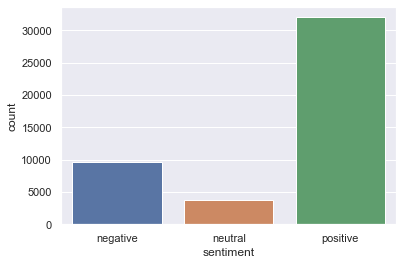

In [148]:
#plotting the total number of songs in each genre
sns.set(style="darkgrid")
ax = sns.countplot(x="sentiment", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x165c6dc50>]],
      dtype=object)

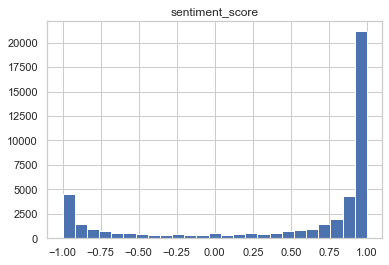

In [139]:
#Examining the sentiment score of all of the songs
df[['sentiment_score']].hist(bins=25)
#most songs have a high postive sentiment scpre